### モジュールのインポート

In [1]:
import numpy as np
import pickle
import MeCab
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### サンプルデータの読み込み

In [2]:
with open('Sample_Data.pickle','rb') as f:
    labels,texts = pickle.load(f)

### 形態素解析の辞書，word2vecモデルの読み込み

In [3]:
#辞書
dic_path="dic/mecab-ipadic-neologd-0.0.5"
tagger = MeCab.Tagger("-Ochasen -d {0}".format(dic_path))
# word2vecのモデル
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('word2vec/entity_vector.model.txt')

### CNNによるテキスト分類

In [4]:
import CNN_text
CNN_classifier = CNN_text.CNN(tagger=tagger,model=model,filter_sizes=[3,4,5],n_epochs=100)

Using TensorFlow backend.


In [5]:
CNN_classifier.fit(labels=labels,texts=texts)

学習開始
EPOCH:1
 epoch 20, loss 3.23474, acc 0.2865
EPOCH:2
 epoch 40, loss 3.22406, acc 0.306
EPOCH:3
 epoch 60, loss 2.56424, acc 0.3375
EPOCH:4
 epoch 80, loss 2.32137, acc 0.3405
EPOCH:5
 epoch 100, loss 2.24004, acc 0.3515
EPOCH:6
 epoch 120, loss 1.96137, acc 0.3625
EPOCH:7
 epoch 140, loss 1.90195, acc 0.379
EPOCH:8
 epoch 160, loss 1.84455, acc 0.378
EPOCH:9
 epoch 180, loss 1.75213, acc 0.3705
EPOCH:10
 epoch 200, loss 1.64909, acc 0.366
EPOCH:11
 epoch 220, loss 1.63673, acc 0.371
EPOCH:12


KeyboardInterrupt: 

### 正解率とConfusionMatrix

正解率：0.3790000081062317


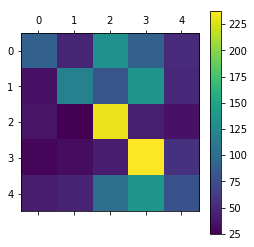

In [6]:
Results = CNN_classifier.Results

print('正解率：{}'.format(max(Results['Accuracy'].values)))
CMX = pd.DataFrame(Results.loc[Results['Accuracy'].argmax(),'confusion_matrix'])
plt.matshow(CMX)
plt.colorbar()

### 最も loss が小さかったモデルの復元

In [7]:
import tensorflow as tf
saver = tf.train.Saver()
Best_sess = tf.InteractiveSession()
saver.restore(Best_sess, "model/Best_model.ckpt")

INFO:tensorflow:Restoring parameters from model/Best_model.ckpt


### 復元したモデルを用いてラベル未知のユーザの推定

In [9]:
predictions, probabilities = CNN_classifier.predict(texts=texts[0:10],sess=Best_sess)

In [10]:
predictions

array([1, 0, 0, 4, 0, 0, 3, 0, 1, 2])

In [11]:
probabilities

array([[ 0.07379516,  0.52246153,  0.15513133,  0.02964528,  0.21896674],
       [ 0.59356242,  0.1240385 ,  0.06789303,  0.12054192,  0.09396414],
       [ 0.77997965,  0.08038723,  0.02185719,  0.0764774 ,  0.0412985 ],
       [ 0.08570655,  0.0865685 ,  0.10672691,  0.21980579,  0.50119227],
       [ 0.44738871,  0.06337936,  0.22382918,  0.04988595,  0.21551676],
       [ 0.38572586,  0.1334758 ,  0.293089  ,  0.14352529,  0.04418402],
       [ 0.13425942,  0.14189519,  0.20434414,  0.29499203,  0.22450927],
       [ 0.55579978,  0.01342454,  0.29138342,  0.09742792,  0.04196436],
       [ 0.11997633,  0.52920556,  0.2547909 ,  0.02584747,  0.07017967],
       [ 0.08480519,  0.17767739,  0.46105546,  0.05403382,  0.22242817]], dtype=float32)